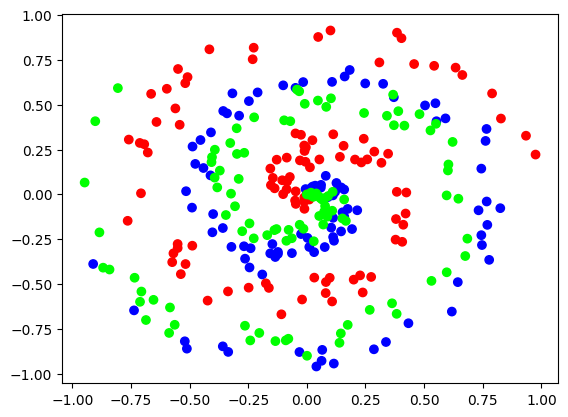

In [1]:
from model import *
from testing import *

import matplotlib.pyplot as plt

# create training and testing data sets that have 3 classes and 100 points/feature sets per class
X_train, y_train = create_data(100, 3)
X_val, y_val = create_data(100, 3)
# plt.scatter(X[:, 0], X[:, 1])
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="brg")
plt.show()

In [5]:
# instantiate the network and add the layers to be used
model = Model()
model.add(LayerDense(2, 64))
model.add(ActivationReLU())
model.add(LayerDense(64, 3))
model.add(ActivationSoftmax())

# set the training objects
model.set(loss=LossCategoricalCrossEntropy(),
          optimizer=OptimizerSGD(decay=0.001),
          accuracy_calculator=Accuracy()
          )

# connect the layers
model.finalize()

In [7]:
# shuffle the training data before trying out the model
indices = np.array(range(X_train.shape[0]))
np.random.shuffle(indices)
X_train = X_train[indices]
y_train = y_train[indices]

model.train(X_train, y_train, validation_data=(X_val, y_val), batch_size=30, summary_freq_batch=5, epochs=10000, summary_freq_epoch=1000)

epoch 1000
step: 1 accuracy: 0.567 loss: 0.849 learning rate: 0.09099181073703366
step: 6 accuracy: 0.800 loss: 0.657 learning rate: 0.09095043201455207
step: 10 accuracy: 0.667 loss: 0.696 learning rate: 0.09091735612328393
epoch accuracy: 0.6266666666666667 epoch loss: 0.7878843576543966 learning rate: 0.09091735612328393
epoch 2000
step: 1 accuracy: 0.667 loss: 0.725 learning rate: 0.047641734159123386
step: 6 accuracy: 0.800 loss: 0.501 learning rate: 0.04763038818766373
step: 10 accuracy: 0.700 loss: 0.559 learning rate: 0.047621315300728606
epoch accuracy: 0.68 epoch loss: 0.6609518569141172 learning rate: 0.047621315300728606
epoch 3000
step: 1 accuracy: 0.700 loss: 0.700 learning rate: 0.03226847370119393
step: 6 accuracy: 0.800 loss: 0.436 learning rate: 0.032263268269075655
step: 10 accuracy: 0.700 loss: 0.517 learning rate: 0.032259105132423624
epoch accuracy: 0.71 epoch loss: 0.6130113174600786 learning rate: 0.032259105132423624
epoch 4000
step: 1 accuracy: 0.700 loss: 0.6

In [8]:
# now try the fashion MNIST data set
from data_set_processing import *

X, y, X_test, y_test = create_mnist_data("fashion_mnist_images")
X, y = process_mnist_data(X, y)
X_test, y_test = process_mnist_data(X_test, y_test)

In [9]:
# instantiate the network
model = Model()

# add layers
model.add(LayerDense(X.shape[1], 64))
model.add(ActivationReLU())
model.add(LayerDense(64, 64))
model.add(ActivationReLU())
model.add(LayerDense(64, 10))
model.add(ActivationSoftmax())

# set training objects
model.set(
    loss=LossCategoricalCrossEntropy(),
    optimizer=OptimizerSGD(decay=0.001),
    accuracy_calculator=Accuracy(),
)

# link layers
model.finalize()

# train the model (fingers-crossed)
model.train(X, y, validation_data=(X_test, y_test), batch_size=128, summary_freq_batch=24, epochs=20, summary_freq_epoch=1)

epoch 1
step: 1 accuracy: 0.086 loss: 2.303 learning rate: 1.0
step: 25 accuracy: 0.086 loss: 2.740 learning rate: 0.9765625
step: 49 accuracy: 0.164 loss: 1.981 learning rate: 0.9541984732824427
step: 73 accuracy: 0.156 loss: 2.097 learning rate: 0.9328358208955223
step: 97 accuracy: 0.125 loss: 2.280 learning rate: 0.9124087591240875
step: 121 accuracy: 0.062 loss: 2.305 learning rate: 0.8928571428571428
step: 145 accuracy: 0.125 loss: 2.228 learning rate: 0.8741258741258741
step: 169 accuracy: 0.195 loss: 2.159 learning rate: 0.8561643835616439
step: 193 accuracy: 0.156 loss: 2.245 learning rate: 0.8389261744966443
step: 217 accuracy: 0.102 loss: 2.347 learning rate: 0.8223684210526316
step: 241 accuracy: 0.109 loss: 2.293 learning rate: 0.8064516129032259
step: 265 accuracy: 0.133 loss: 2.296 learning rate: 0.7911392405063291
step: 289 accuracy: 0.070 loss: 2.328 learning rate: 0.7763975155279503
step: 313 accuracy: 0.109 loss: 2.316 learning rate: 0.7621951219512195
step: 337 accu

In [28]:
# ad hoc checking if the prediction lines up with the true label

idx = 20
image_data = X_test[idx]
model.predict(image_data)
predictions = int(model.output_layer_activation.predictions())
print(predictions)
print(y_test[idx])

7
7


In [29]:
model.output_layer_activation

In [32]:
model.output_layer_activation.output[:, 7]

array([0.99690834])